In [1]:
import re
import random
import torch.nn as nn
import torch.optim as optim
import pickle as p
from model import CharRnn
from tools import *
import string

In [21]:
def get_names(filename,reverse=0):
    names=open(filename, encoding='utf-8').read().strip()
    if reverse:
        return names[::-1].split('\n')
    else:
        return names.split('\n')
names=get_names('../data/male.txt',reverse=0)
names[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

In [24]:
index = {}
for ch in string.ascii_letters+'-':
    index[ch]=len(index)
index['\n'] = len(index)
n_letters = len(index)
index

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 'A': 26,
 'B': 27,
 'C': 28,
 'D': 29,
 'E': 30,
 'F': 31,
 'G': 32,
 'H': 33,
 'I': 34,
 'J': 35,
 'K': 36,
 'L': 37,
 'M': 38,
 'N': 39,
 'O': 40,
 'P': 41,
 'Q': 42,
 'R': 43,
 'S': 44,
 'T': 45,
 'U': 46,
 'V': 47,
 'W': 48,
 'X': 49,
 'Y': 50,
 'Z': 51,
 '-': 52,
 '\n': 53}

In [26]:
data = names.copy()
for i in range(len(names)):
    data[i] = list(names[i]) + ['\n']
for line in data[:10]:
    print(line)

['A', 'a', 'm', 'i', 'r', '\n']
['A', 'a', 'r', 'o', 'n', '\n']
['A', 'b', 'b', 'e', 'y', '\n']
['A', 'b', 'b', 'i', 'e', '\n']
['A', 'b', 'b', 'o', 't', '\n']
['A', 'b', 'b', 'o', 't', 't', '\n']
['A', 'b', 'b', 'y', '\n']
['A', 'b', 'd', 'e', 'l', '\n']
['A', 'b', 'd', 'u', 'l', '\n']
['A', 'b', 'd', 'u', 'l', 'k', 'a', 'r', 'i', 'm', '\n']


In [27]:
model = CharRnn(len(index), 128, 128)
optimizer = optim.RMSprop(model.parameters(), lr=0.01, weight_decay=0.0001)
criterion = nn.NLLLoss()

In [6]:
output_tensor = {}
for w in index:
    output_tensor.setdefault(w, get_output_tensor(w, index))
output_tensor

{'a': tensor([0]),
 'b': tensor([1]),
 'c': tensor([2]),
 'd': tensor([3]),
 'e': tensor([4]),
 'f': tensor([5]),
 'g': tensor([6]),
 'h': tensor([7]),
 'i': tensor([8]),
 'j': tensor([9]),
 'k': tensor([10]),
 'l': tensor([11]),
 'm': tensor([12]),
 'n': tensor([13]),
 'o': tensor([14]),
 'p': tensor([15]),
 'q': tensor([16]),
 'r': tensor([17]),
 's': tensor([18]),
 't': tensor([19]),
 'u': tensor([20]),
 'v': tensor([21]),
 'w': tensor([22]),
 'x': tensor([23]),
 'y': tensor([24]),
 'z': tensor([25]),
 'A': tensor([26]),
 'B': tensor([27]),
 'C': tensor([28]),
 'D': tensor([29]),
 'E': tensor([30]),
 'F': tensor([31]),
 'G': tensor([32]),
 'H': tensor([33]),
 'I': tensor([34]),
 'J': tensor([35]),
 'K': tensor([36]),
 'L': tensor([37]),
 'M': tensor([38]),
 'N': tensor([39]),
 'O': tensor([40]),
 'P': tensor([41]),
 'Q': tensor([42]),
 'R': tensor([43]),
 'S': tensor([44]),
 'T': tensor([45]),
 'U': tensor([46]),
 'V': tensor([47]),
 'W': tensor([48]),
 'X': tensor([49]),
 'Y': tens

In [7]:
import math
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s/60)
    s -= m*60
    return '%dm %ds' %(m,s)

In [8]:
epochNum = 10
TRAINSIZE = len(data)
batch = 100
total_lost=[]
for epoch in range(epochNum):
    for batchIndex in range(int(TRAINSIZE / batch)):
        model.zero_grad()
        loss = 0
        counts = 0
        for case in range(batchIndex * batch, min((batchIndex + 1) * batch, TRAINSIZE)):
            s = data[case]
            hidden = model.initHidden()
            t, o = get_lstm_input(s, output_tensor)
            output, hidden = model(t, hidden)
            loss += criterion(output, o)
            counts += 1
        loss = loss / counts
        loss.backward()
        total_lost.append(loss.item())
        print(epoch, loss.item())
        
        optimizer.step()
    if epoch%9 == 0:
        torch.save(model, 'name-fornt.pt')

C:\Users\刘威\Untitled Folder 1\model.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


0 4.019649982452393
0 4.0532732009887695
0 3.8206872940063477
0 3.7289657592773438
0 3.724724292755127
0 3.3524887561798096
0 6.117305755615234
0 3.6491539478302
0 3.360358238220215
0 3.1510276794433594
0 4.130142688751221
0 2.87829327583313
0 3.813021659851074
0 2.9774954319000244
0 3.322381019592285
0 3.0697519779205322
0 2.930454730987549
0 4.302990436553955
0 2.7642972469329834
0 3.2004451751708984
0 3.3627231121063232
0 2.7758169174194336
0 3.478005886077881
0 3.9708242416381836
0 3.3634676933288574
0 3.192230701446533
0 3.3549792766571045
0 2.7607951164245605
0 2.847275733947754
1 3.2966673374176025
1 4.203595161437988
1 3.3107552528381348
1 3.1465325355529785
1 3.1665329933166504
1 3.1174240112304688
1 3.17462420463562
1 2.946934938430786
1 2.7718303203582764
1 2.6588714122772217
1 3.038106679916382
1 2.553765296936035
1 3.069840669631958
1 2.624390125274658
1 2.674039602279663
1 2.689617395401001
1 2.5582125186920166
1 3.105461835861206
1 2.5707452297210693
1 2.8147499561309814

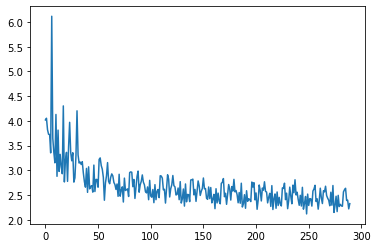

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.plot(total_lost)
plt.show()

In [10]:
def get_input(word, index):
    tmpIn = []
    for i in word:
        tmpIn.append(autograd.Variable(torch.LongTensor([index[i]])))
    return torch.cat(tmpIn)

In [28]:

max_length = 100
def invert_dict(d):
    return dict((v, k) for k, v in d.items())

num2word = invert_dict(index)

def sample(model,startWord='#',reverse=0):
    if reverse:
        startWord=startWord[::-1]
        input = get_output_tensor(startWord[-1], index)
    else:
        input=get_input(startWord,index)
    hidden = model.initHidden()
    output_name = startWord
    all_letters=[startWord]
    for i in range(max_length):
        output, hidden = model(input, hidden)
        # print(hidden)
        topv, topi = output.data[-1:].topk(5)
        letters=[]
        for i in topi.data.tolist()[0]:
            if num2word[i]=='\n':
                letters.append('EOF')
            else:
                letters.append(num2word[i])
        all_letters.append(letters)
        w = num2word[topi.data.tolist()[0][0]]
        if w >='A' and w <='Z':
            output_name += w
            break
        elif w=='\n':
            break
        else:
            output_name += w
        input = get_output_tensor(w, index)
    all_letters.append(output_name)
    if reverse:
        output_name=output_name[::-1]
    return output_name,all_letters

model1 = torch.load('name-forward0.pt',map_location=torch.device('cpu'))
model2 = torch.load('name-back4.pt',map_location=torch.device('cpu'))
names=[]
i=0
all_letters=[]
while i<10:
    #此行是输入开头的字符
    name1,all_letters=sample(model1,'Ma',reverse=0)
#     name1,all_letters=sample(model2,'om',reverse=1)
    if name1 not in names:
        names.append(name1)
        print(name1)
        i=i+1
    #此行是输入结尾的字符
    

Marth
Marce
Mart
Man
Marke
Marton
Mant
Marcel
Malton
Mance


In [17]:

from graphviz import Digraph

u = Digraph('unix', filename='unix.gv',
            node_attr={'color': 'lightblue2', 'style': 'filled'})
u.attr(size='6,6')


u.node(all_letters[0])
for i in range(1,len(all_letters)-1):
    temp=all_letters[i][0]
    all_letters[i][0]=all_letters[i][2]
    all_letters[i][2]=temp
    for j in range(5):
        u.node(str(i)+str(j),label=all_letters[i][j])
        if i==1:
            u.edge(all_letters[0],str(i)+str(j))
        else:
            u.edge(str(i-1)+'2',str(i)+str(j))

u.node(all_letters[-1])

u.edge(str(len(all_letters)-2)+'2',all_letters[-1])


u.view()

'unix.gv.pdf'